## Overview
### Data
I am using a Kaggle dataset from the ([link](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations)) it contains:

- articles.csv: which contains information about fashion items.
- customers.csv: which contains information about users.
- transactions_train.csv: which contains information about transactions.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

plt.style.use(["fivethirtyeight"])

## Articles analysis

In [2]:
articles_data_df = pd.read_csv("data/articles.csv", encoding="utf-8")

In [101]:
articles_data_df.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
print(f"Article df shape : {articles_data_df.shape}")

Article df shape : (105542, 25)


In [5]:
articles_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [117]:
missing_values = articles_data_df.isnull().sum()
columns_missing_values = missing_values[missing_values != 0]
print(f"There is %d columns with missing values" % len(columns_missing_values))
print("Columns with missing values: ", columns_missing_values.index.to_list())

There is 1 columns with missing values
Columns with missing values:  ['detail_desc']


In [118]:
percentage_missing_values = articles_data_df.isnull().sum() / len(articles_data_df) * 100
percentage_missing_values = percentage_missing_values[percentage_missing_values != 0]
print("Percentage missing values per feature: ")
percentage_missing_values

Percentage missing values per feature: 


detail_desc    0.394156
dtype: float64

In [8]:
unique_value_counts = articles_data_df.nunique()
unique_value_counts

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [ ]:
articles_data_df[articles_data_df["detail_desc"].isnull()]

1467                      Jersey Fancy
2644                             Shoes
2645                             Shoes
2742                 Under-, Nightwear
2743                 Under-, Nightwear
                     ...              
67838                   Dresses Ladies
72720    Woven/Jersey/Knitted mix Baby
72721    Woven/Jersey/Knitted mix Baby
93144                      Accessories
95624                      Accessories
Name: garment_group_name, Length: 416, dtype: object

### Univariate analysis

The goal of univariate analysis is to understand the distribution and characteristics of each variable independently.

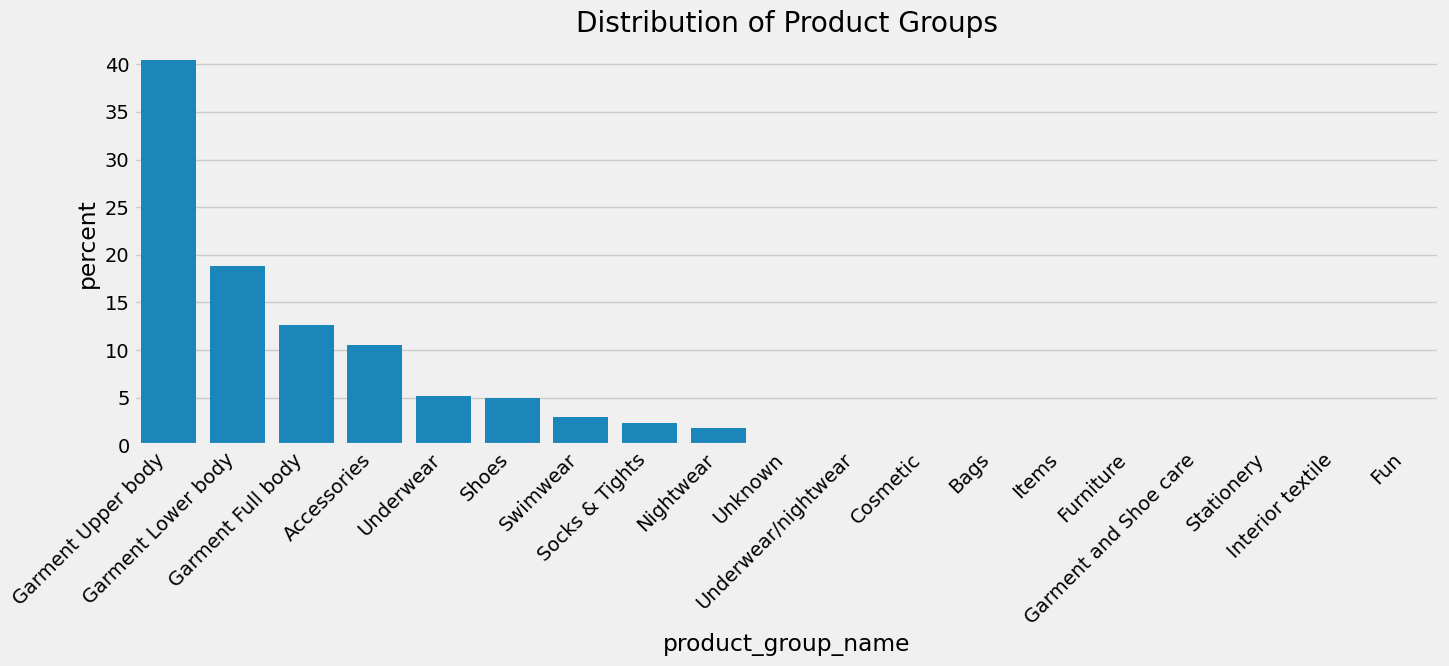

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.countplot(x="product_group_name", data=articles_data_df, order=articles_data_df["product_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Product Groups")
plt.show()

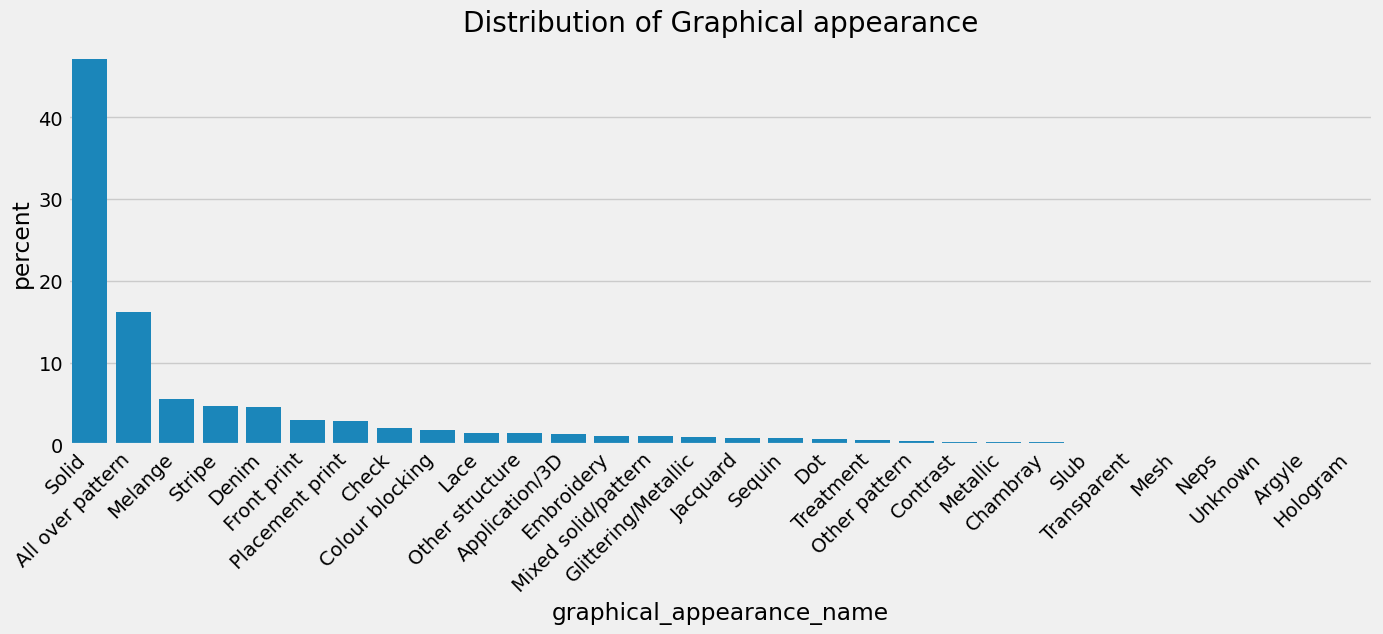

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x="graphical_appearance_name", data=articles_data_df, order=articles_data_df["graphical_appearance_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Graphical appearance")
plt.show()

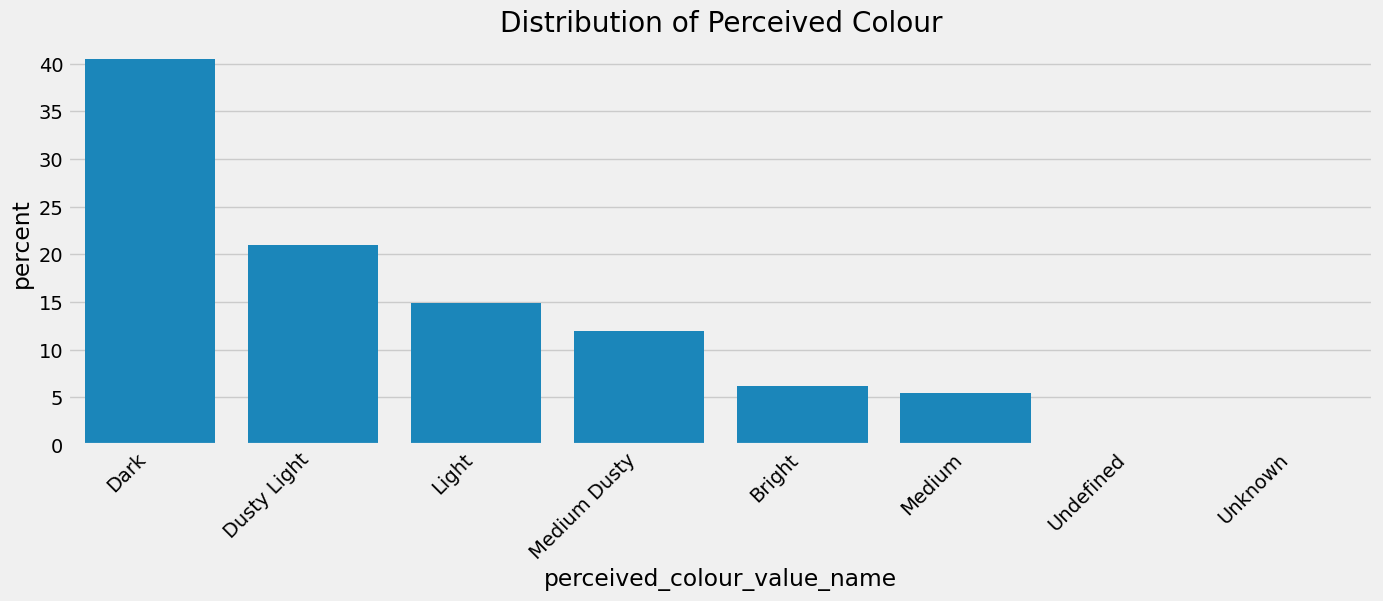

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x="perceived_colour_value_name", data=articles_data_df, order=articles_data_df["perceived_colour_value_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Perceived Colour")
plt.show()

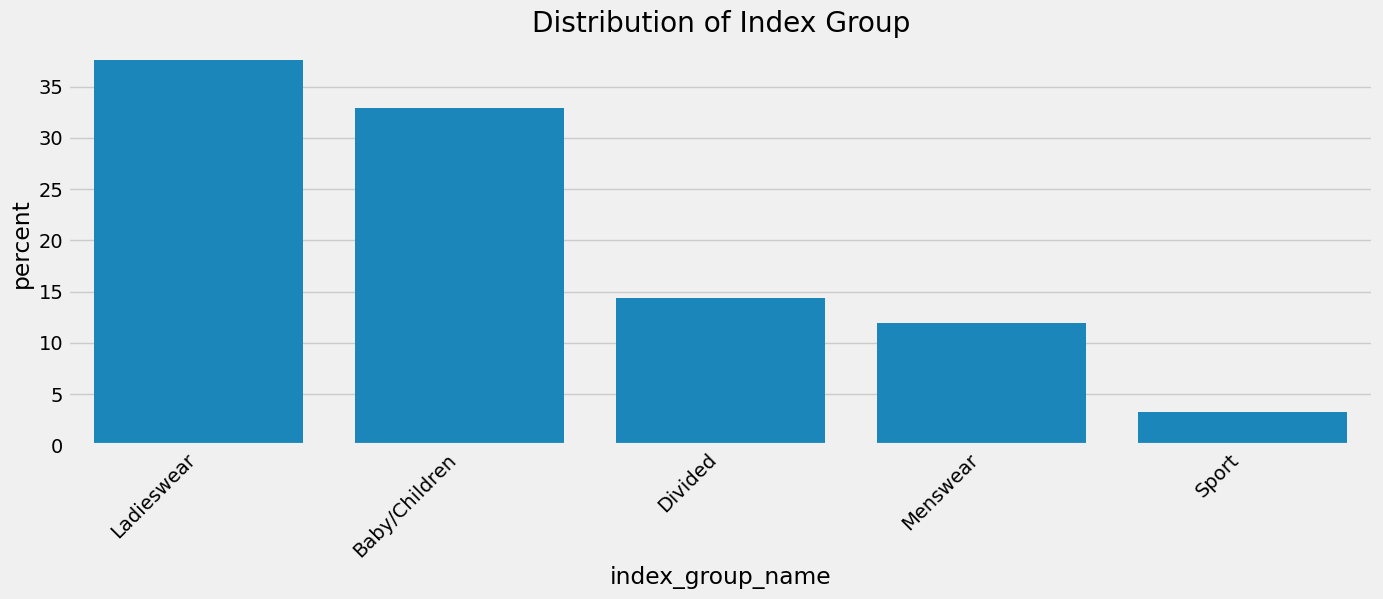

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x="index_group_name", data=articles_data_df, order=articles_data_df["index_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Index Group")
plt.show()

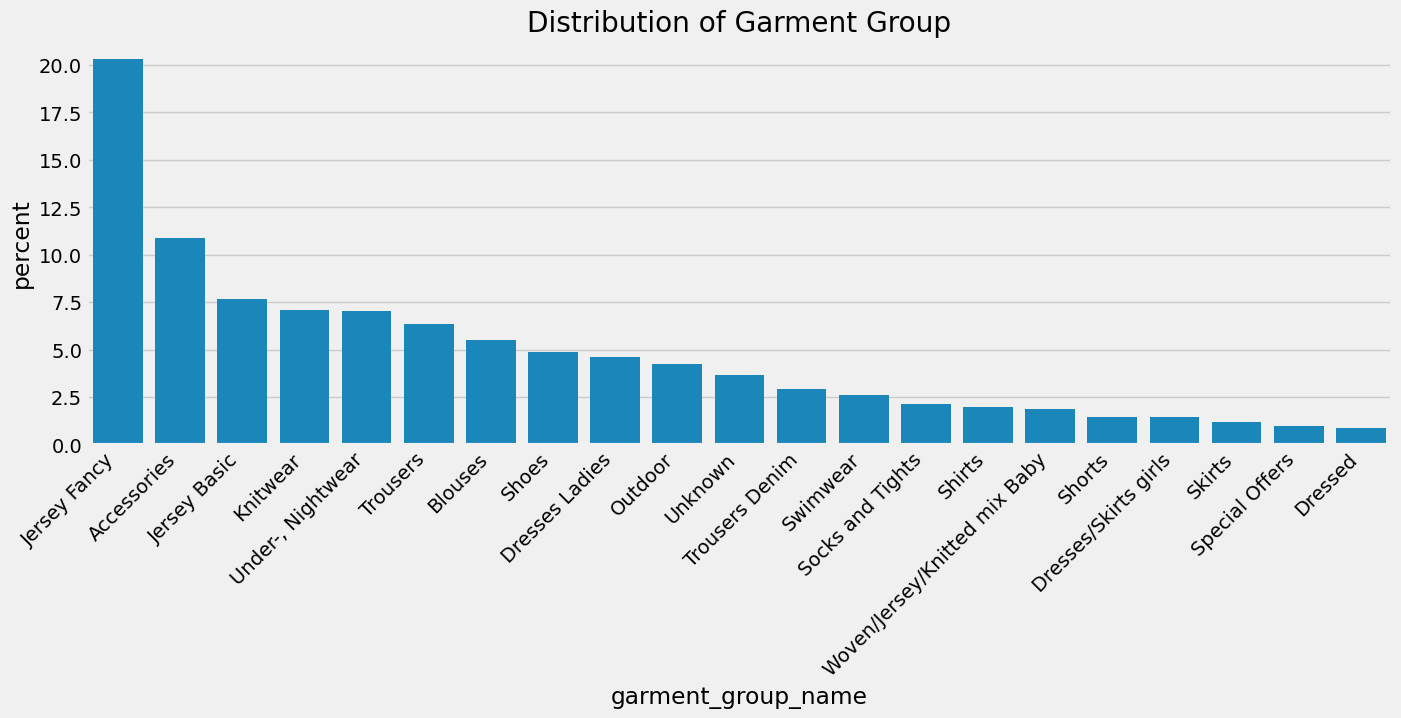

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x="garment_group_name", data=articles_data_df, order=articles_data_df["garment_group_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Garment Group")
plt.show()

-  The "Jersey Fancy" category has the highest percentage, approaching 20%. This suggests that it is the most common garment group in the dataset and might represent a popular or high-stocked item.
- "Accessories" comes second, it only reaches a bit over 10%.
- Categories such as "Dressed," "Special Offers," "Skirts," and "Dresses/Skirts Girls" have a very low presence (below 2.5%). This could indicate that these items are either:
	- less popular
	- seasonal
	- not heavily stocked.
- The distribution is highly uneven, with a few groups dominating.
- low-percentage categories might be specialty items or have a niche audience.
- Unknown Category are directly categories which could indicate missing or uncategorized data.

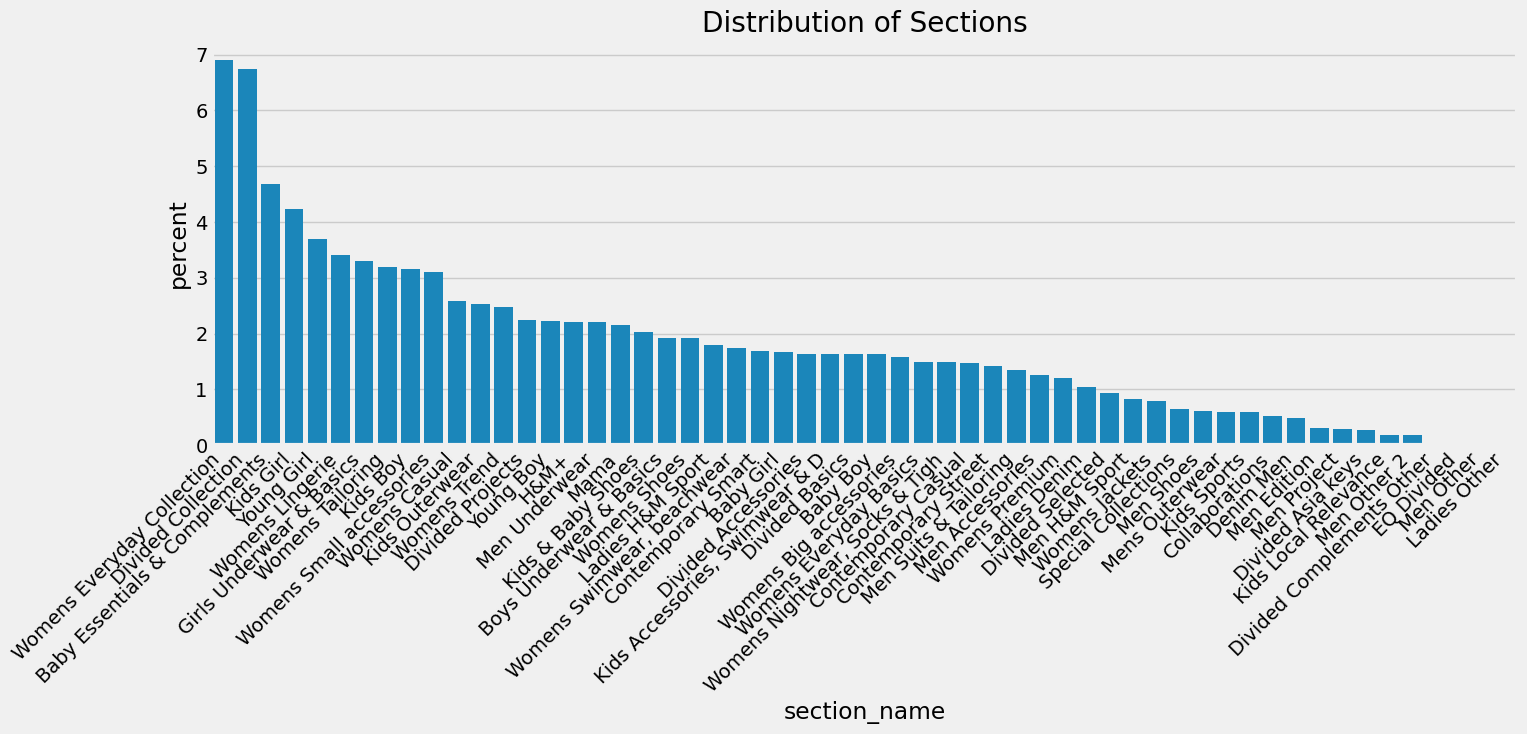

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x="section_name", data=articles_data_df, order=articles_data_df["section_name"].value_counts().index, stat="percent")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Sections")
plt.show()

-  The plot shows a wide variety of sections, indicating a diverse product offering. However, there’s a steep drop from the top sections to the lower ones, which suggests that some sections dominate the inventory more than others.
- "Womens Everyday Collection" section has the highest percentage, close to 7%. This suggests that products within this section are the most common or heavily stocked, possibly indicating a focus on women’s daily wear as a priority area.

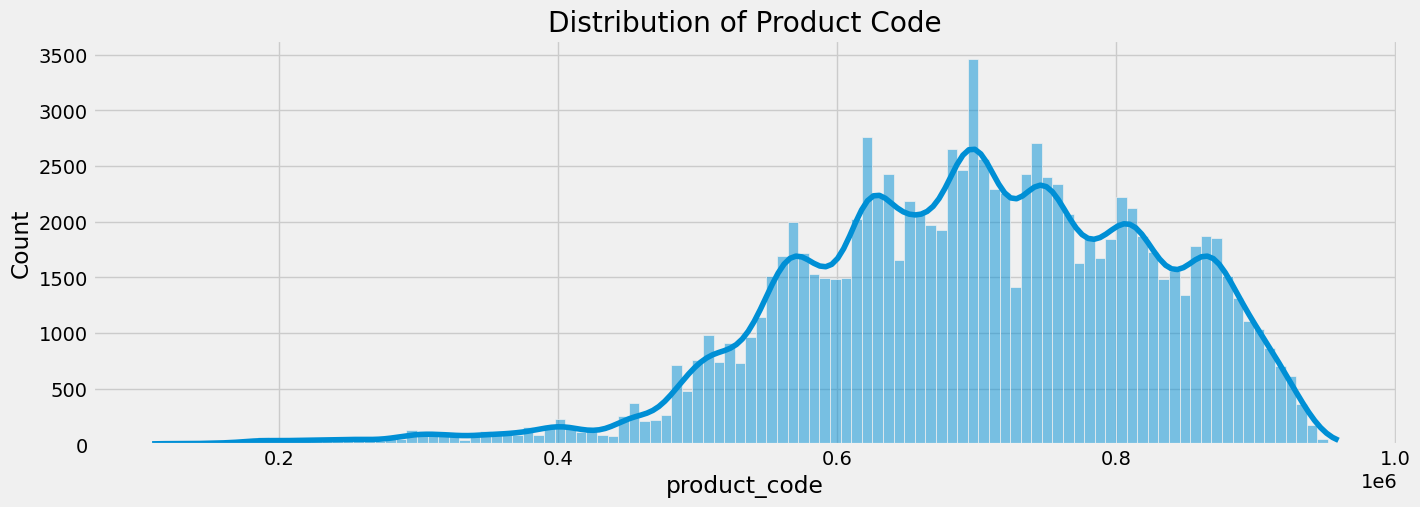

In [15]:
plt.figure(figsize=(15, 5))
sns.histplot(articles_data_df["product_code"], kde=True)
plt.title("Distribution of Product Code")
plt.show()

- One big peak peak between 0.5 and 0.7 million, indicating that a large number of products fall within this range of product codes. This could imply that H&M introduced a significant number of products or item variations in this range (possibly corresponding to a specific time or product line).
- There are several smaller peaks on both sides of the main concentration. These could represent different product categories, batches, or release cycles within the dataset.
- The left part has a lower density. This may suggest that less common products have lower product codes.
- If the product codes are assigned sequentially or in blocks, the distribution could reflect time-based patterns (such as product lines launched at different periods). The density around certain ranges might also indicate higher popularity or frequent restocking of products within those code ranges.

### Bivariate analysis

In [16]:
import winsound
import time


def make_beep(repetition=3, time_interval_seconds=4):
    for i in range(repetition):
        winsound.MessageBeep()
        # winsound.Beep(2794, 180)
        time.sleep(time_interval_seconds)


make_beep()

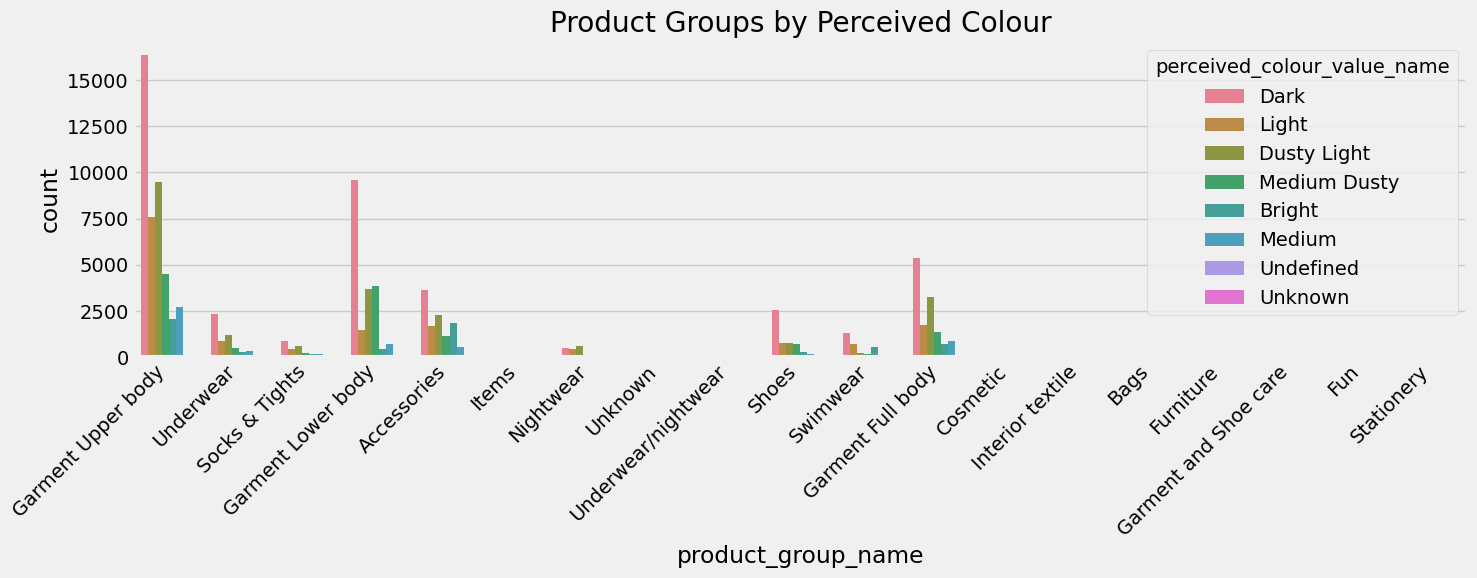

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(x="product_group_name", hue="perceived_colour_value_name", data=articles_data_df)
plt.xticks(rotation=45, ha="right")
plt.title("Product Groups by Perceived Colour")
plt.tight_layout()
plt.show()

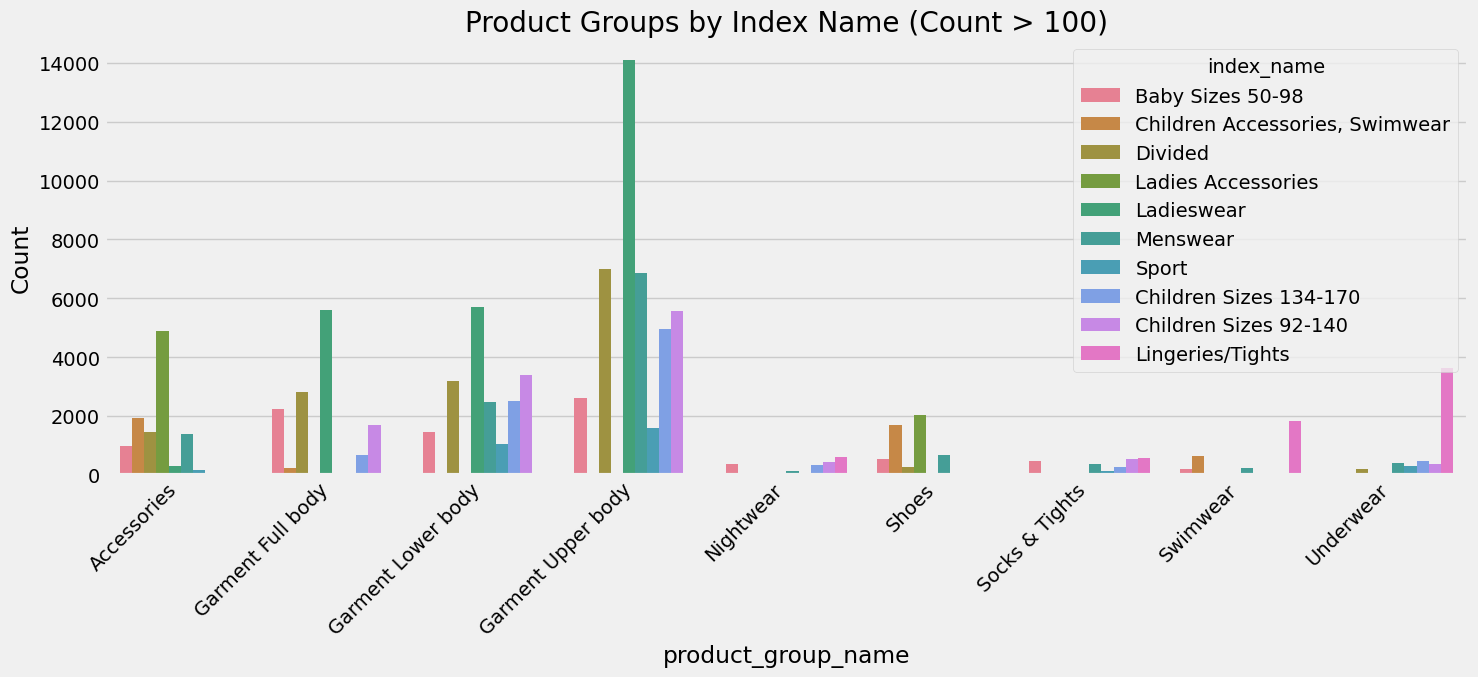

In [99]:
count_data = articles_data_df.groupby(["product_group_name", "index_name"]).size().reset_index(name="count")
filtered_data = count_data[count_data["count"] > 100]


plt.figure(figsize=(15, 7))
sns.barplot(x="product_group_name", y="count", hue="index_name", data=filtered_data)
plt.xticks(rotation=45, ha="right")
plt.title("Product Groups by Index Name (Count > 100)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

- "Garment Upper body" has high volume in "Dark" and "Medium Dusty" colors.
- 

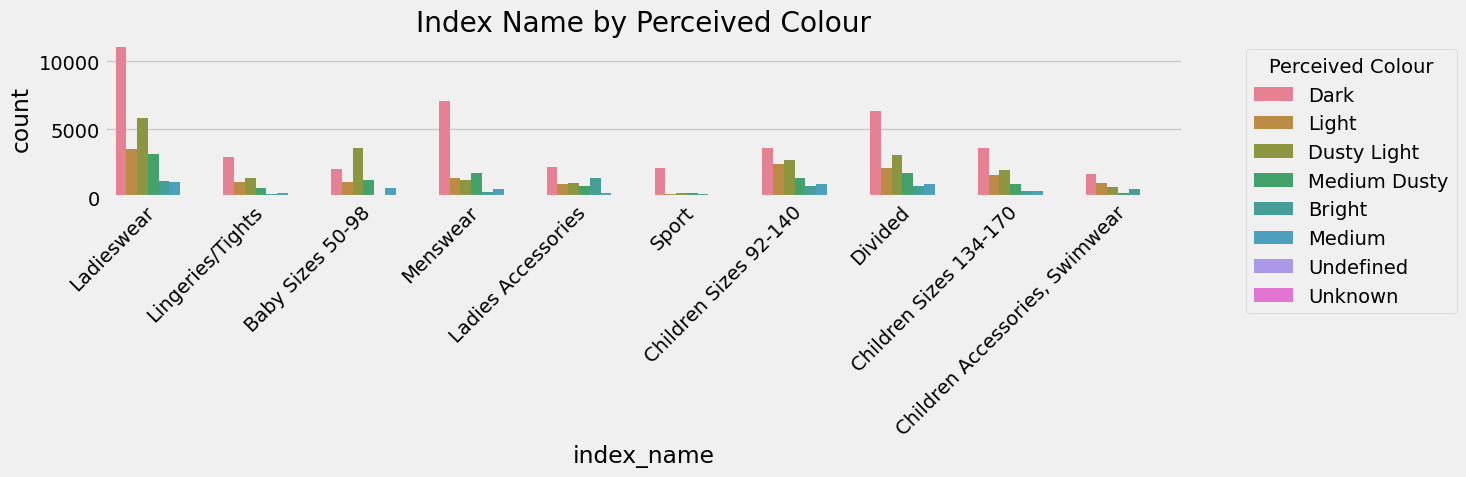

In [96]:
plt.figure(figsize=(15, 5))
sns.countplot(x="index_name", hue="perceived_colour_value_name", data=articles_data_df)
plt.xticks(rotation=45, ha="right")
plt.title("Index Name by Perceived Colour")
plt.legend(title="Perceived Colour", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

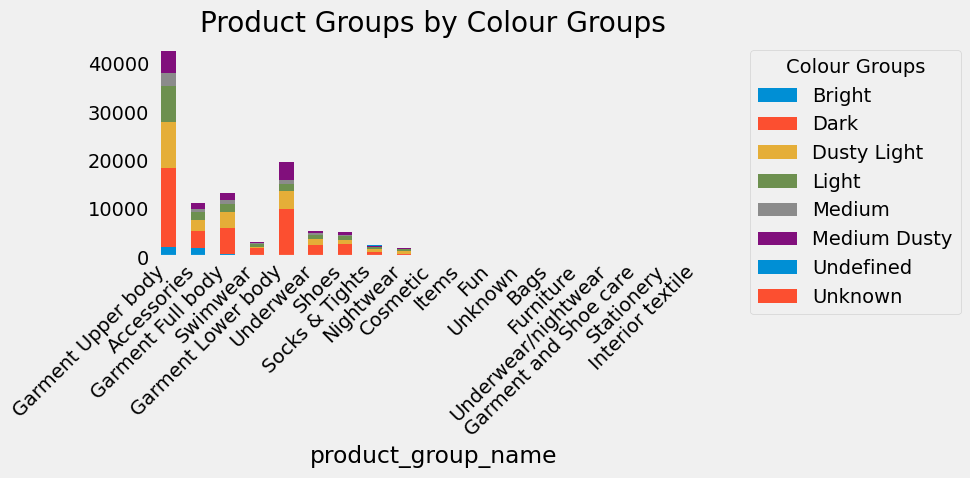

In [64]:
# Group and aggregate the data
grouped_data = articles_data_df.groupby(["product_group_name", "perceived_colour_value_name"]).size().unstack()

# Sort the data
# Sort by total count of each product group (descending order)
sorted_data = grouped_data.sort_values(by=grouped_data.columns.to_list(), ascending=False, axis=0)

# Plot the sorted data
ax = sorted_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 5),
    use_index=True,
    grid=False,
)

plt.title("Product Groups by Colour Groups")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Colour Groups", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

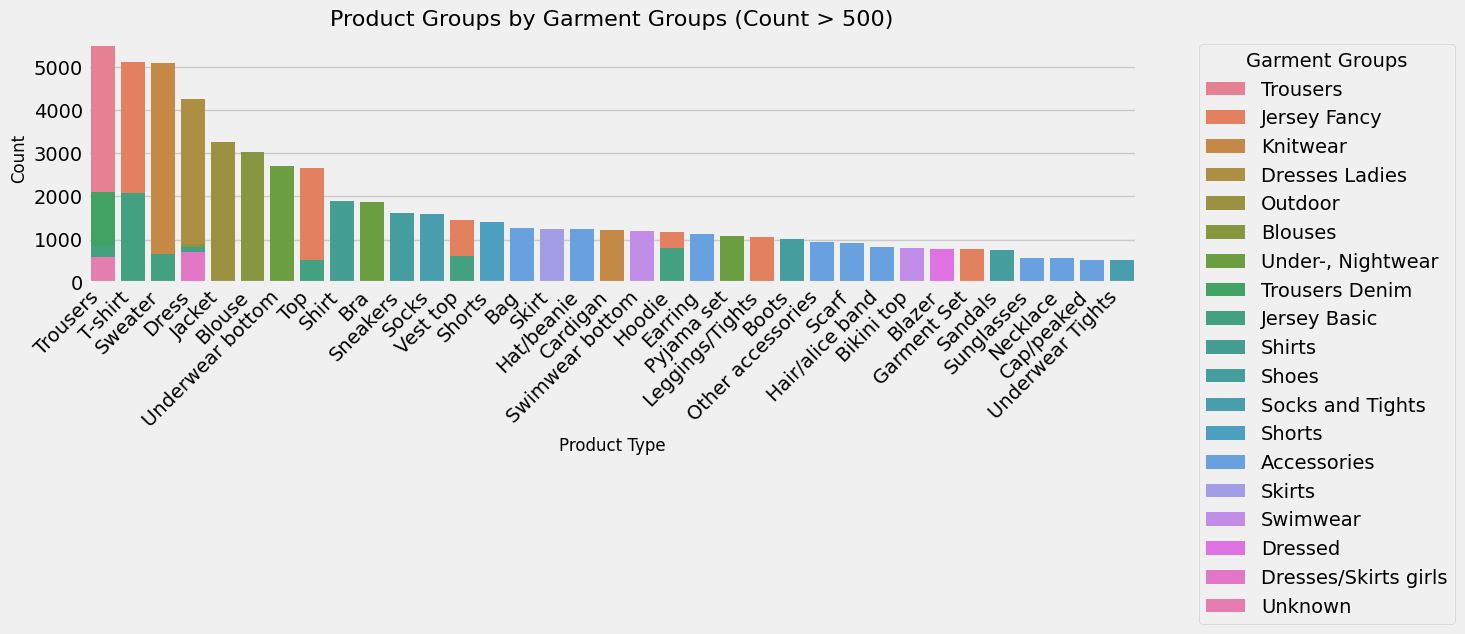

In [91]:
grouped_data = articles_data_df.groupby(["product_type_name", "garment_group_name"]).size().reset_index(name="count")

# Filter data to keep only groups with count > 500
filtered_data = grouped_data[grouped_data["count"] > 500]
sorted_data = filtered_data.sort_values(by="count", ascending=False)

plt.figure(figsize=(15, 5))

sns.barplot(data=sorted_data, x="product_type_name", y="count", hue="garment_group_name", dodge=False)

plt.title("Product Groups by Garment Groups (Count > 500)", fontsize=16)
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Garment Groups", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

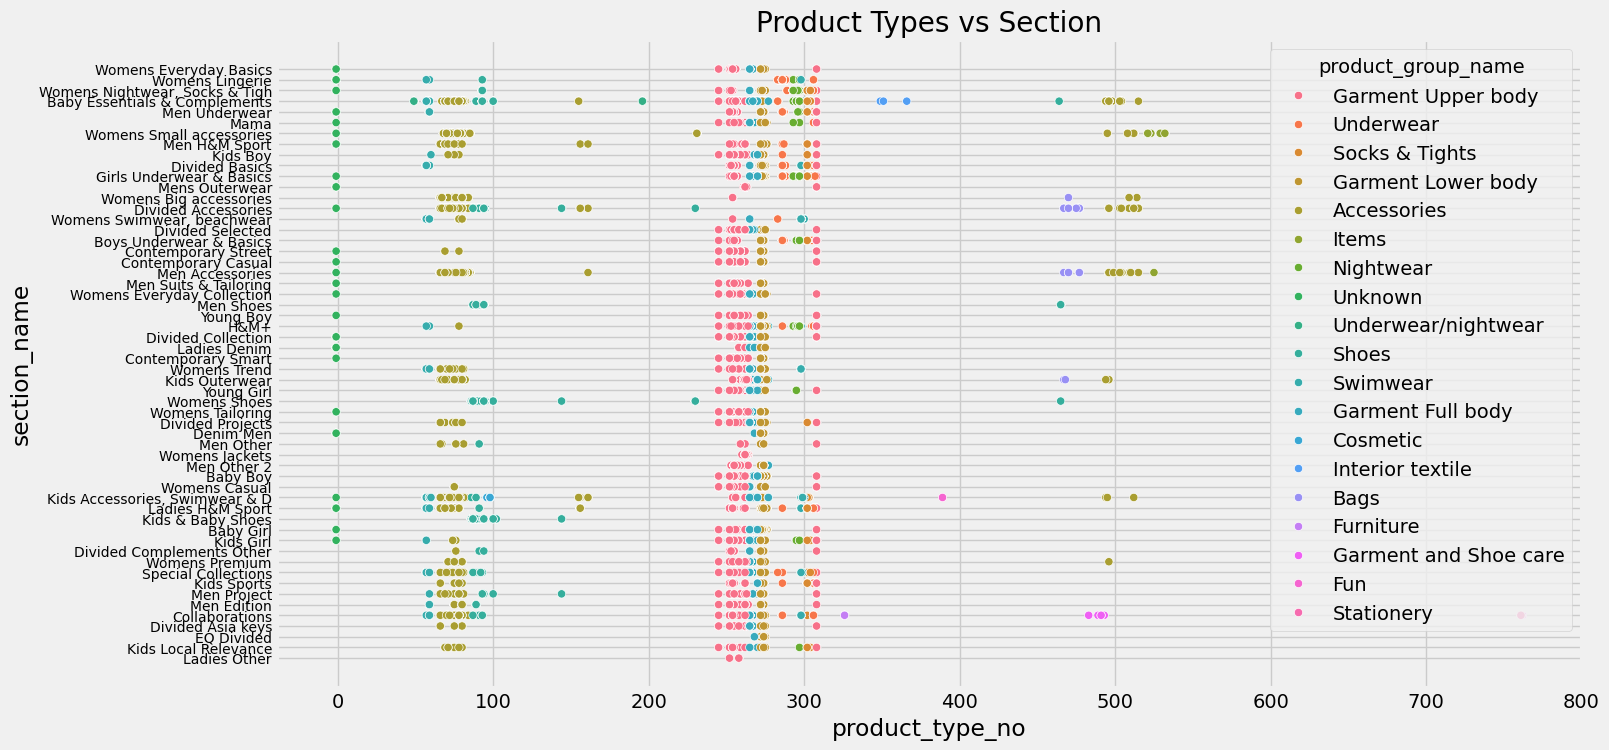

In [94]:
plt.figure(figsize=(15, 8))
custom_palette = sns.color_palette("RdYlBu", n_colors=len(articles_data_df["product_group_name"].unique()))

sns.scatterplot(
    x="product_type_no",
    y="section_name",
    hue="product_group_name",
    data=articles_data_df,
)
plt.title("Product Types vs Section")
plt.yticks(size=10)
plt.show()

- Garment Upper body (pink dots) appears consistently across many section, clustering around the 200-300 range
- Most sections have a diverse mix of product types.
- Certain product groups appear more frequently in specific ranges:
	- Unknown product are cluster on the 0 range
    - Bags tend to be cluster between 400 and 500
	- Accessories tend to cluster in higher numbers (500) or lower numbers between 0 and 100 
	- Underwear and basics tend to be in lower numbers (0-200)
- Some products appear sporadically like "Furniture" and "Stationery"
- There's a clear organizational structure with similar product grouped together
- Some product type range show high specialization (few product types) while others are more diverse

### Multivariate analysis

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, pearsonr
from joblib import Parallel, delayed

In [ ]:
def cramers_v(x: pd.Series, y: pd.Series) -> float:
    """
    Calculate Cramér's V statistic for association between two categorical variables.

    Cramér's V is a measure of association between two categorical variables,
    and it ranges from 0 to 1, where 0 means no association and 1 means complete association.
    source: https://www.statology.org/cramers-v-in-python/

    Args:
        x (pd.Series): A pandas Series representing the first categorical variable.
        y (pd.Series): A pandas Series representing the second categorical variable.

    Returns:
        float: The Cramér's V statistic, which is a measure of association.
    """
    confusion_matrix = pd.crosstab(x, y)  # frequency of each occurrences pair or value
    chi2 = chi2_contingency(confusion_matrix)[0]  # Chi-squared test for independence
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n  # normalized Chi-squared statistic
    # nb_row, nb_col = confusion_matrix.shape
    # reduce the bias introduced by small sample sizes.
    # phi2corr = max(0, phi2 - ((nb_col - 1) * (nb_row - 1)) / (n - 1))
    # row_corr = nb_row - ((nb_row - 1) ** 2) / (n - 1)
    # col_corr = nb_col - ((nb_col - 1) ** 2) / (n - 1)
    # return np.sqrt(phi2 / min((col_corr - 1), (row_corr - 1)))  # normalization to have value between 0 and 1
    return np.sqrt(phi2 / (min(confusion_matrix.shape) - 1))

In [ ]:
def calculate_correlation(x: pd.Series, y: pd.Series) -> float:
    """
    Calculate the correlation between two variables, handling different data types.

    This function automatically chooses the correct method for calculating correlation:
    - Cramér's V for two categorical variables
    - Correlation Ratio (eta) for a categorical and a continuous variable
    - Pearson correlation for two continuous variables

    Args:
        x (pd.Series): The first variable (can be categorical or continuous).
        y (pd.Series): The second variable (can be categorical or continuous).

    Returns:
        float: The correlation coefficient, a measure of association between the variables.
    """
    if x.dtype == "O" and y.dtype == "O":  # Both variables are categorical (object dtype)
        return cramers_v(x, y)
    elif (x.dtype == "O" and y.dtype != "O") or (x.dtype != "O" and y.dtype == "O"):  # x is categorical, and y is continuous
        return 0
    else:  # Both variables are continuous
        # return abs(pearsonr(x, y)[0])
        return 0


def get_categorical_correlations(df: pd.DataFrame) -> pd.DataFrame:
    """
        Calculate the correlation matrix only for the categorical variable in the dataframe.

    Args:
        df (pd.DataFrame): The dataframe you want to calculate the correlation matrix for.

    Returns:
        pd.DataFrame: The correlation matrix
    """
    categorical_variables = df.dtypes[df.dtypes != int].index.to_list()
    corr_matrix = pd.DataFrame(index=categorical_variables, columns=categorical_variables)
    num_columns = len(categorical_variables)
    for i in range(num_columns):
        for j in range(i, num_columns):
            if i != j:
                corr = calculate_correlation(df.iloc[:, i], df.iloc[:, j])
                corr_matrix.iloc[i, j] = corr
                corr_matrix.iloc[j, i] = corr
            else:
                corr_matrix.iloc[i, j] = 1.0

    return corr_matrix

In [34]:
def get_top_correlations(corr_matrix, top_n=-1):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    corr_pairs.sort(key=lambda x: x[2], reverse=True)
    if top_n > 0:
        return corr_pairs[:top_n]
    else:
        return corr_pairs

In [ ]:
corr_matrix = get_categorical_correlations(articles_data_df)


In [35]:
top_correlations = get_top_correlations(corr_matrix, top_n=10)

print("Top 10 most correlated categorical variable pairs:")
for var1, var2, corr in top_correlations:
    print(f"{var1} - {var2}: {corr:.4f}")

Top 10 most correlated variable pairs:
index_code - index_name: 1.0000
index_name - index_group_name: 1.0000
index_code - index_group_name: 1.0000
department_name - garment_group_name: 0.9998
index_group_name - section_name: 0.9979
prod_name - index_group_name: 0.9960
product_type_name - product_group_name: 0.9956
prod_name - index_code: 0.9953
prod_name - index_name: 0.9953
garment_group_name - detail_desc: 0.9926


In [36]:
for var1, var2, corr in get_top_correlations(corr_matrix):
    print(f"{var1} - {var2}: {corr:.4f}")

index_code - index_name: 1.0000
index_name - index_group_name: 1.0000
index_code - index_group_name: 1.0000
department_name - garment_group_name: 0.9998
index_group_name - section_name: 0.9979
prod_name - index_group_name: 0.9960
product_type_name - product_group_name: 0.9956
prod_name - index_code: 0.9953
prod_name - index_name: 0.9953
garment_group_name - detail_desc: 0.9926
prod_name - garment_group_name: 0.9913
index_group_name - detail_desc: 0.9872
prod_name - section_name: 0.9837
index_code - detail_desc: 0.9809
index_name - detail_desc: 0.9809
department_name - index_code: 0.9793
department_name - index_name: 0.9793
prod_name - product_group_name: 0.9725
section_name - detail_desc: 0.9713
prod_name - department_name: 0.9688
department_name - index_group_name: 0.9634
index_code - section_name: 0.9617
index_name - section_name: 0.9617
prod_name - detail_desc: 0.9617
product_group_name - detail_desc: 0.9588
prod_name - product_type_name: 0.9550
department_name - detail_desc: 0.9534

 Cramér's V correlation test (value range from 0 to 1)
- I have many pairs with extremely high correlations (near 1.0), which could indicate redundancy among variables. I might want to remove redundant variables.
- product_type_name - garment_group_name (0.6671) and other such correlations indicate that while these variables are related, the relationship is not perfect.
    - This could mean that the same product type might appear in several garment groups.
- Below 0.5 those are weak correlations this suggests that while there is some level of association between these variables, it is not very strong.
    - These variables might not be as directly related as the others.
    

## Customers analysis

In [140]:
customers_data_df = pd.read_csv("data/customers.csv", encoding="utf-8")

In [141]:
customers_data_df.head(2)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [142]:
print(f"Customers df shape : {customers_data_df.shape}")

Customers df shape : (1371980, 7)


In [143]:
customers_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [144]:
missing_values = customers_data_df.isnull().sum()
columns_missing_values = missing_values[missing_values != 0]
print(f"There is {len(columns_missing_values)} columns with missing values")
print("Columns with missing values: ", columns_missing_values.index.to_list())

There is 5 columns with missing values
Columns with missing values:  ['FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age']


In [145]:
percentage_missing_values = missing_values / len(customers_data_df) * 100
print("Percentage of missing values for each column: ")
percentage_missing_values

Percentage of missing values for each column: 


customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.167000
age                        1.156066
postal_code                0.000000
dtype: float64

In [223]:
customers_data_df.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          3
age                            84
postal_code                352899
dtype: int64

In [224]:
customers_data_df["FN"].unique()

array([nan,  1.])

In [227]:
customers_data_df["Active"].unique()

array([nan,  1.])

In [228]:
customers_data_df["club_member_status"].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [229]:
customers_data_df["fashion_news_frequency"].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [274]:
print("Age min: ", customers_data_df["age"].min())
print("Age max: ", customers_data_df["age"].max())
print("Age mean: ", customers_data_df["age"].mean())

Age min:  16.0
Age max:  99.0
Age mean:  36.386964565794


In [288]:
age_bins = [15, 18, 25, 35, 45, 55, 65, 80, 100]
age_labels = ["15-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66-80", "80+"]

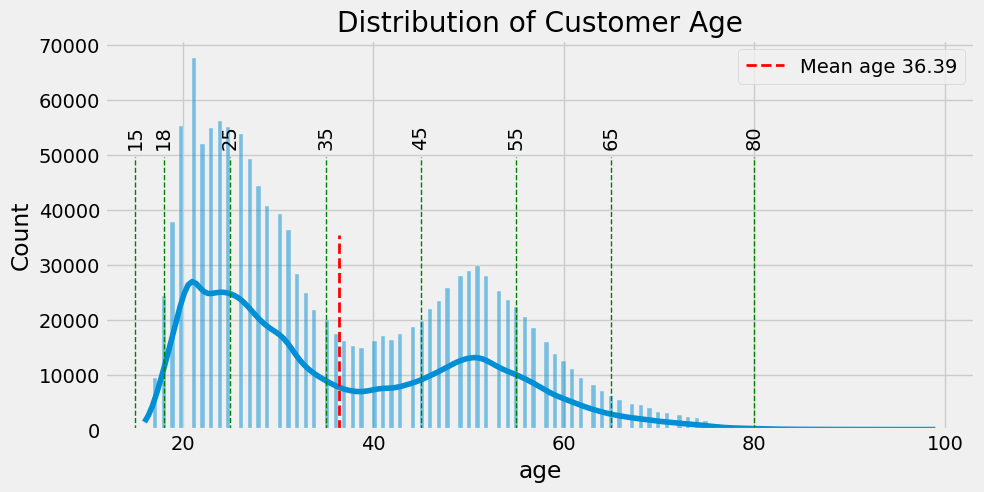

In [293]:
plt.figure(figsize=(10, 5))
sns.histplot(customers_data_df["age"], kde=True)
mean_age = customers_data_df["age"].mean()
plt.axvline(mean_age, linestyle="--", color="r", linewidth=2, label=f"Mean age {mean_age:.2f}", ymax=0.5)

for i in range(len(age_labels)):
    plt.axvline(age_bins[i], linestyle="--", linewidth=1, color="g", ymax=0.7)
    plt.text(age_bins[i], plt.gca().get_ylim()[1] - 20000, f"{age_bins[i]}", ha="center", va="bottom", rotation=90)
plt.legend()
plt.title("Distribution of Customer Age")
plt.subplots_adjust(top=0.85)
plt.show()

- The highest peak is around the early 20s (around age 22-25), suggesting that young adults are the largest demographic in the dataset.
- A secondary peak appears around the 50s, indicating another significant group, potentially middle-aged customers.
- Age gap between 30 and 40 years.
- Green dashed line are future bins indicator

## Transactions analysis

In [157]:
transaction_data_df = pd.read_csv("data/transactions_train.csv", encoding="utf-8")
transaction_data_df.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


In [158]:
print(f"Transactions df shape {transaction_data_df.shape}")

Transactions df shape (31788324, 5)


In [159]:
transaction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [160]:
missing_values = transaction_data_df.isnull().sum()
missing_values

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [ ]:
transaction_data_df["t_dat"] = pd.to_datetime(transaction_data_df["t_dat"])


In [221]:
transaction_data_df["day"] = transaction_data_df["t_dat"].dt.day
transaction_data_df["month"] = transaction_data_df["t_dat"].dt.month
transaction_data_df["year"] = transaction_data_df["t_dat"].dt.year

In [230]:
transaction_data_df.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
month                    12
month_sin                11
month_cos                11
hour                      1
day                      31
year                      3
dtype: int64

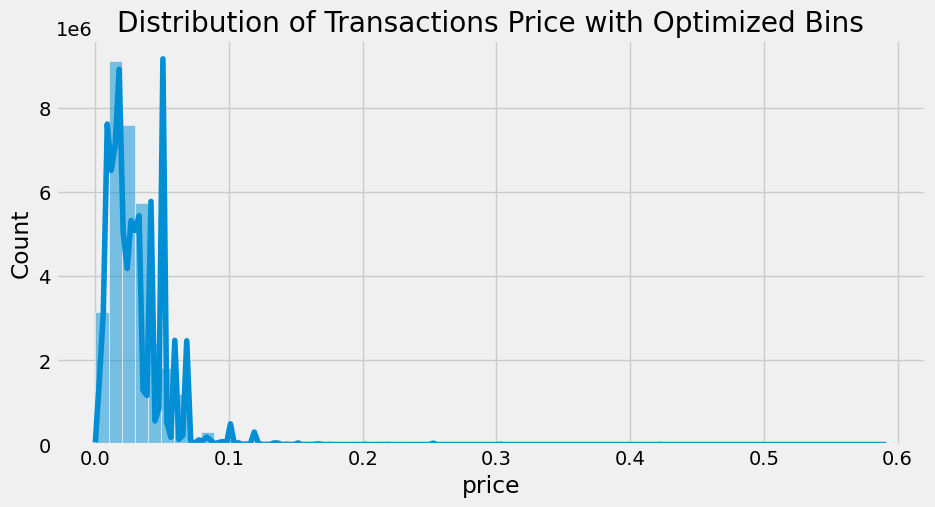

In [182]:
plt.figure(figsize=(10, 5))
sns.histplot(transaction_data_df["price"], bins=60, kde=True)  # Increase bins for finer detail
plt.title("Distribution of Transactions Price with Optimized Bins")
plt.show()

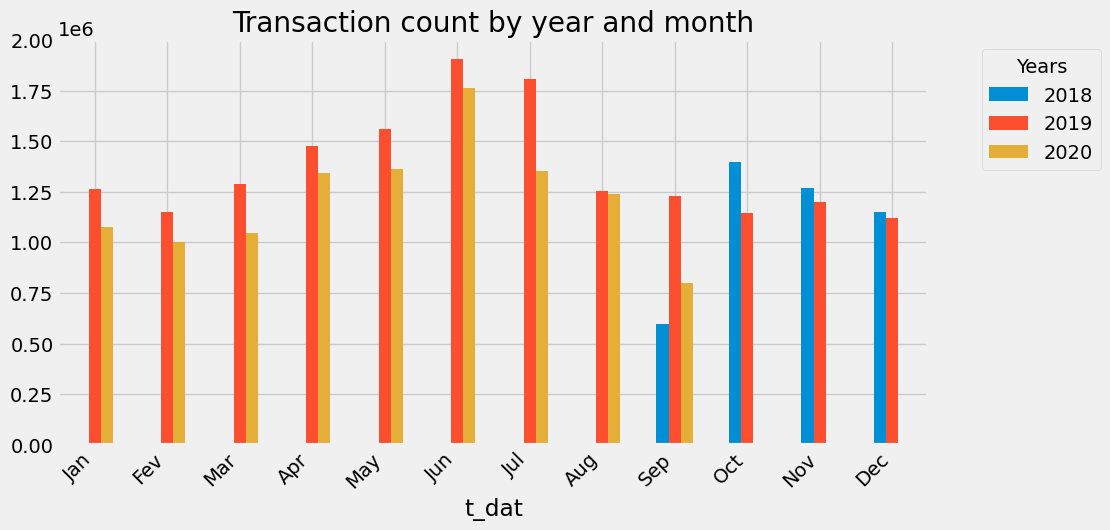

In [220]:
grouped_data = transaction_data_df.groupby([transaction_data_df["t_dat"].dt.month, transaction_data_df["t_dat"].dt.year]).size().unstack()
ax = grouped_data.plot(kind="bar", stacked=False, figsize=(10, 5))
plt.title("Transaction count by year and month")
plt.legend(title="Years", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_xticklabels(["Jan", "Fev", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45, ha="right")

plt.show()

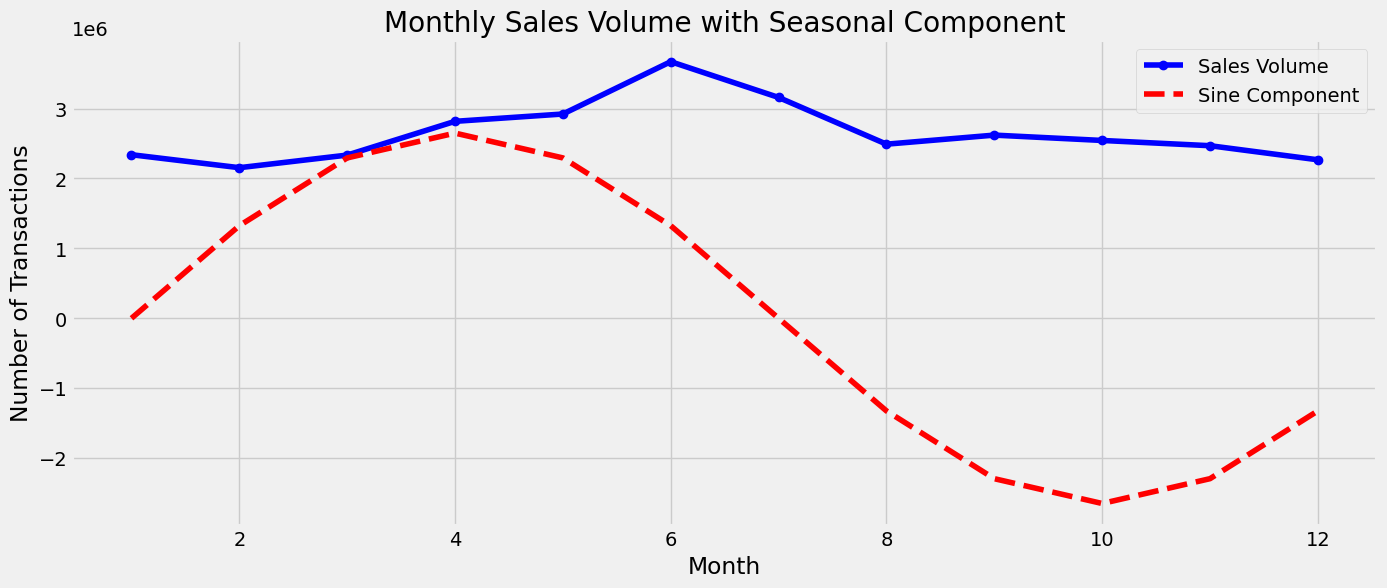

In [200]:
# Monthly sales volume with sin/cos overlay
plt.figure(figsize=(15, 6))
monthly_sales = transaction_data_df.groupby("month").size()
plt.plot(monthly_sales.index, monthly_sales, "bo-", label="Sales Volume")
plt.plot(monthly_sales.index, np.sin(2 * np.pi * (monthly_sales.index - 1) / 12) * monthly_sales.mean(), "r--", label="Sine Component")
plt.title("Monthly Sales Volume with Seasonal Component")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.legend()

- Peak sales occur around month 6 (June)
- Lowest sales volume is observed around month 12 (December)
- There's a relatively stable period between months 8-11 (August-November)
- The sine wave (red dashed line) attempts to model the seasonal pattern in the data (basic sine approximation of seasonal pattern)
- The wave peaks around month 4 (April), suggesting an expected seasonal high point
- The wave troughs around month 10 (October), indicating an expected seasonal low point
- The actual sales don't perfectly follow the sine wave, indicating other factors influence sales beyond seasonality
- The December dip is somewhat surprising for retail, as it's typically a strong month for holiday shopping

Text(0, 0.5, 'Number of Transactions')

<Figure size 1500x600 with 0 Axes>

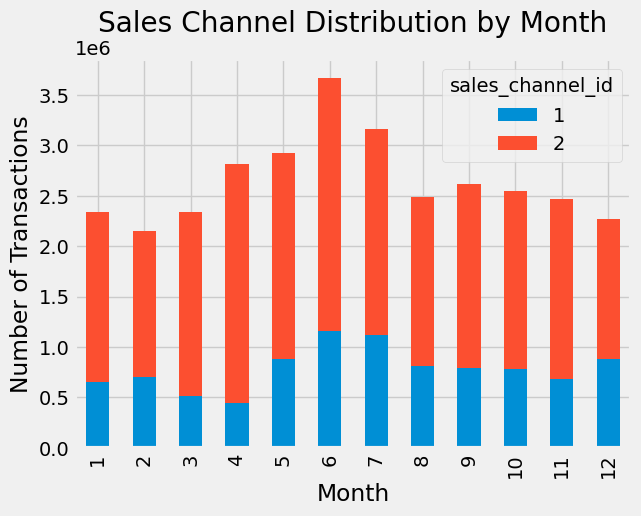

In [201]:
# Sales channel distribution by month with seasonal components
channel_by_month = transaction_data_df.groupby(["month", "sales_channel_id"]).size().unstack()
plt.figure(figsize=(15, 6))
channel_by_month.plot(kind="bar", stacked=True)
plt.title("Sales Channel Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")

Text(0, 0.5, 'Avg Items per Customer')

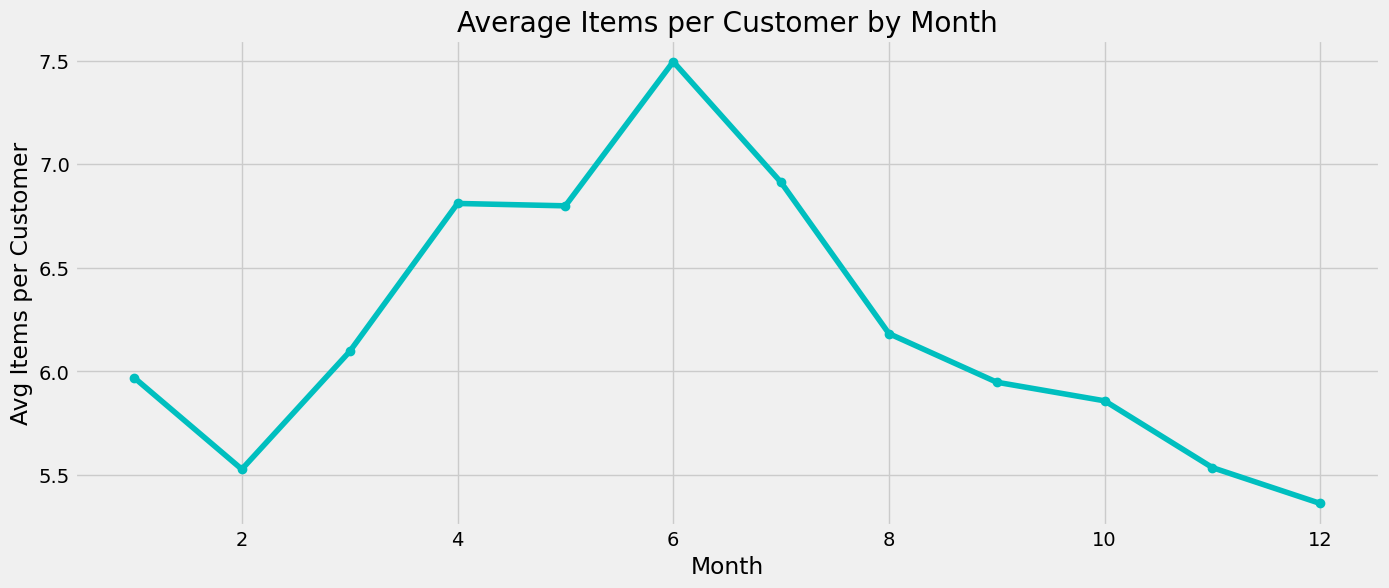

In [206]:
# Average items per customer by month
items_per_customer = transaction_data_df.groupby("month").size() / transaction_data_df.groupby("month")["customer_id"].nunique()
plt.figure(figsize=(15, 6))
plt.plot(items_per_customer.index, items_per_customer, "co-", label="Items per Customer")
plt.title("Average Items per Customer by Month")
plt.xlabel("Month")
plt.ylabel("Avg Items per Customer")
plt.show()

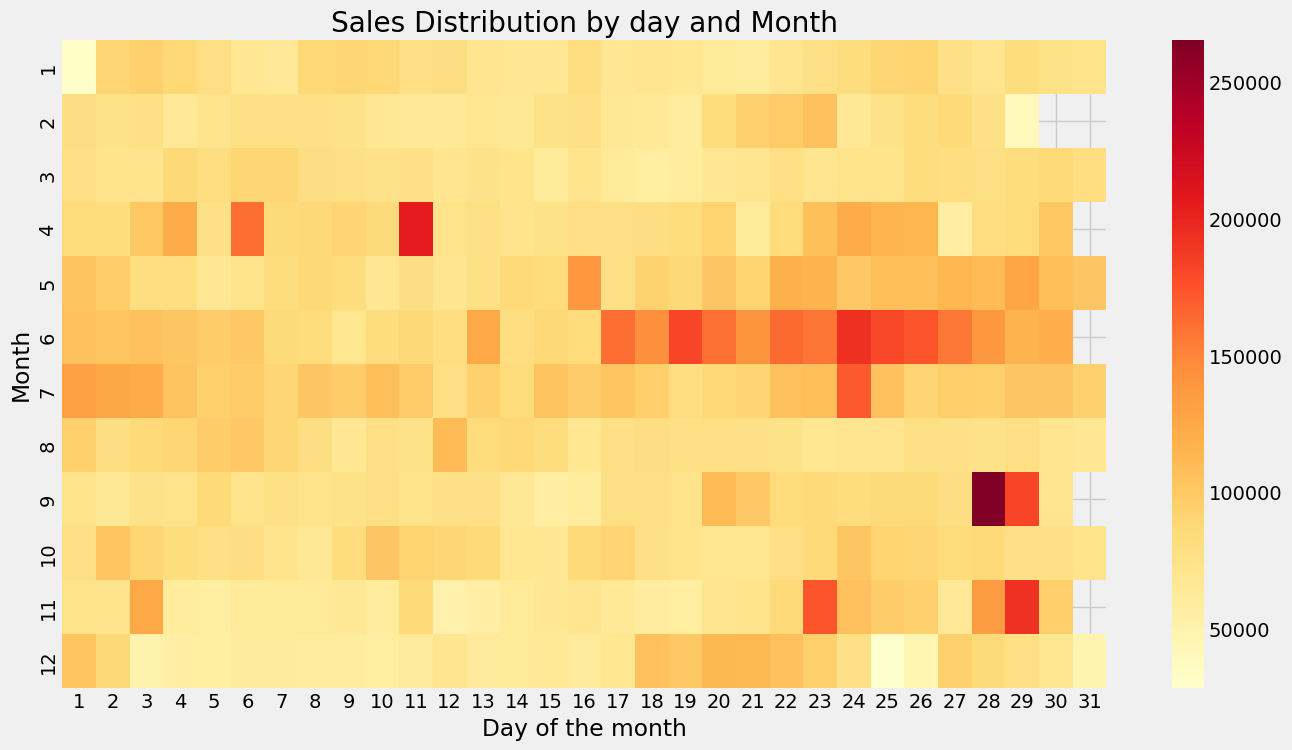

In [211]:
transaction_data_df["day"] = transaction_data_df["t_dat"].dt.day
sales_heatmap = transaction_data_df.groupby(["month", "day"]).size().unstack()
plt.figure(figsize=(15, 8))
sns.heatmap(sales_heatmap, cmap="YlOrRd", annot=False)
plt.title("Sales Distribution by day and Month")
plt.xlabel("Day of the month")
plt.ylabel("Month")
plt.show()